<a href="https://colab.research.google.com/github/ashrafalam123/Machine-Learning-Projects/blob/master/CNNimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [1]:
import torch

In [3]:
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([
    transforms.ToTensor()
])
mnist_dataset = torchvision.datasets.MNIST(
    root=image_path,
    train=True,
    transform=transform,
    download=True
)
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000,len(mnist_dataset)))

mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path,
    train=False,
    transform=transform,
    download=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2615310.17it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 493913.30it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3783620.86it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4998826.76it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
from torch.utils.data import DataLoader
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(
    mnist_train_dataset,
    batch_size=batch_size,
    shuffle=True
)
valid_dl = DataLoader(
    mnist_valid_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [5]:
import torch.nn as nn
model = nn.Sequential()
model.add_module(
    'conv1',
    nn.Conv2d(
        in_channels=1,
        out_channels=32,
        kernel_size=5,
        padding=2
    )
)

model.add_module(
    'relu1',
    nn.ReLU()
)

model.add_module(
    'pool1',
    nn.MaxPool2d(kernel_size=2)
)

model.add_module(
    'conv2',
    nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=5,
        padding=2
    )
)

model.add_module(
    'relu2',
    nn.ReLU()
)

model.add_module(
    'pool2',
    nn.MaxPool2d(kernel_size=2)
)

In [6]:
x = torch.ones((4,1,28,28))
#images,channels,height,width
model(x).shape

torch.Size([4, 64, 7, 7])

In [7]:
model.add_module('flatten',nn.Flatten())
x = torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 3136])

In [8]:
model.add_module('fc1',nn.Linear(3136,1024))
model.add_module('relu3',nn.ReLU())
model.add_module('dropout',nn.Dropout(0.5))
model.add_module('fc2',nn.Linear(1024,10))

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [10]:
def train(model, num_epochs, train_dl,valid_dl):
  loss_hist_train = [0] * num_epochs
  accuracy_hist_train = [0]* num_epochs
  loss_hist_valid = [0] * num_epochs
  accuracy_hist_valid = [0]* num_epochs
  for epoch in range(num_epochs):
    model.train()
    for x_batch, y_batch in train_dl:
      pred = model(x_batch)
      loss = loss_fn(pred,y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_hist_train[epoch] += loss.item() * y_batch.size(0)
      is_correct = (torch.argmax(pred,dim=1) == y_batch).float()
      accuracy_hist_train[epoch] += is_correct.sum()
    loss_hist_train[epoch] /= len(train_dl.dataset)
    accuracy_hist_train[epoch] /= len(train_dl.dataset)

    model.eval()
    with torch.no_grad():
      for x_batch, y_batch in valid_dl:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch)
        loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred,dim=1) == y_batch).float()
        accuracy_hist_valid[epoch] += is_correct.sum()
    loss_hist_valid[epoch] /= len(valid_dl.dataset)
    accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

    print(f'Epoch {epoch + 1} accuracy: '
        f'{accuracy_hist_train[epoch]: .4f} val_accuracy'
        f'{accuracy_hist_valid[epoch]: .4f}')
  return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [11]:
torch.manual_seed(1)
num_epochs = 20
hist = train(
    model,
    num_epochs,
    train_dl,
    valid_dl
)

Epoch 1 accuracy:  0.9488 val_accuracy 0.9829
Epoch 2 accuracy:  0.9845 val_accuracy 0.9876
Epoch 3 accuracy:  0.9887 val_accuracy 0.9883
Epoch 4 accuracy:  0.9912 val_accuracy 0.9886
Epoch 5 accuracy:  0.9929 val_accuracy 0.9894
Epoch 6 accuracy:  0.9950 val_accuracy 0.9906
Epoch 7 accuracy:  0.9951 val_accuracy 0.9859
Epoch 8 accuracy:  0.9963 val_accuracy 0.9893
Epoch 9 accuracy:  0.9960 val_accuracy 0.9905
Epoch 10 accuracy:  0.9965 val_accuracy 0.9903
Epoch 11 accuracy:  0.9975 val_accuracy 0.9893
Epoch 12 accuracy:  0.9970 val_accuracy 0.9913
Epoch 13 accuracy:  0.9972 val_accuracy 0.9900
Epoch 14 accuracy:  0.9979 val_accuracy 0.9906
Epoch 15 accuracy:  0.9986 val_accuracy 0.9906
Epoch 16 accuracy:  0.9976 val_accuracy 0.9894
Epoch 17 accuracy:  0.9975 val_accuracy 0.9899
Epoch 18 accuracy:  0.9982 val_accuracy 0.9907
Epoch 19 accuracy:  0.9984 val_accuracy 0.9909
Epoch 20 accuracy:  0.9987 val_accuracy 0.9908


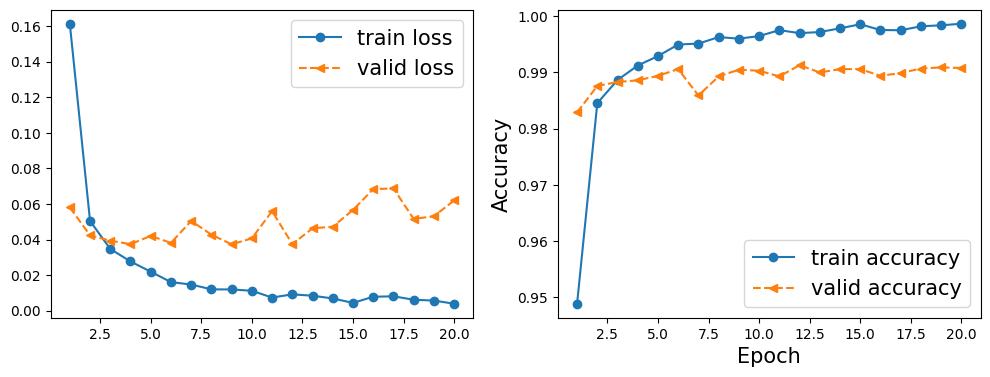

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize= (12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist[0],'-o' ,label='train loss')
ax.plot(x_arr,hist[1],'--<',label='valid loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist[2],'-o',label='train accuracy')
ax.plot(x_arr,hist[3],'--<',label='valid accuracy')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Accuracy',size = 15)
plt.show()

In [13]:
pred = model(mnist_test_dataset.data.unsqueeze(1)/255.)
is_correct = (torch.argmax(pred,dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.9923


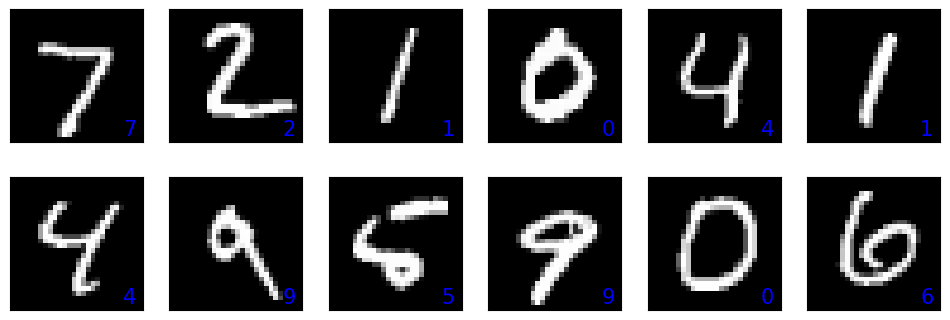

In [16]:
fig = plt.figure(figsize = (12,4))
for i in range(12):
  ax = fig.add_subplot(2,6,i+1)
  ax.set_xticks([]); ax.set_yticks([])
  img = mnist_test_dataset[i][0][0,:,:]
  pred = model(img.unsqueeze(0).unsqueeze(1))
  y_pred = torch.argmax(pred)
  ax.imshow(img,cmap='gray')
  ax.text(0.9,0.1, y_pred.item(), size = 15, color = 'blue', horizontalalignment='center', verticalalignment='center',transform = ax.transAxes)
plt.show()